In [10]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from sklearn.metrics import confusion_matrix

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
x_train[0].shape

(28, 28)

In [6]:
# Build the model
i = Input(shape=(x_train[0].shape))
x = LSTM(128)(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)


In [7]:
# compile and train
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 54ms/step - accuracy: 0.7748 - loss: 0.6765 - val_accuracy: 0.9650 - val_loss: 0.1183
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 48ms/step - accuracy: 0.9652 - loss: 0.1142 - val_accuracy: 0.9705 - val_loss: 0.0969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 37ms/step - accuracy: 0.9775 - loss: 0.0750 - val_accuracy: 0.9761 - val_loss: 0.0771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9840 - loss: 0.0539 - val_accuracy: 0.9800 - val_loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9856 - loss: 0.0439 - val_accuracy: 0.9810 - val_loss: 0.0586
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9843 - val_loss: 0.0490
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9875 - val_loss: 0.0442
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.992

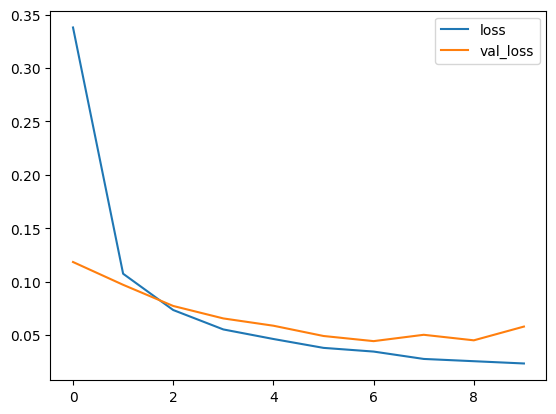

In [8]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

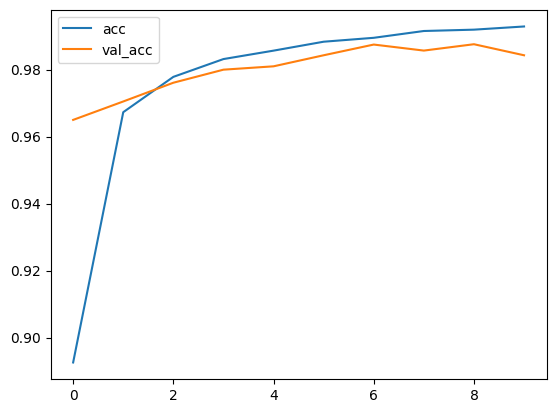

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Confusion matrix without normalization
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1126    2    0    0    0    0    2    5    0]
 [   2    7 1015    0    0    0    2    6    0    0]
 [   0    0    5 1001    0    2    0    2    0    0]
 [   0    0    0    0  964    0    5    3    3    7]
 [   2    1    0    8    0  875    2    2    2    0]
 [   3    3    0    0    6    1  945    0    0    0]
 [   1    7    5    0    1    0    0 1013    0    1]
 [  15    1    6    3    1    0    2    3  939    4]
 [   2    0    0    0    6    1    0   10    2  988]]


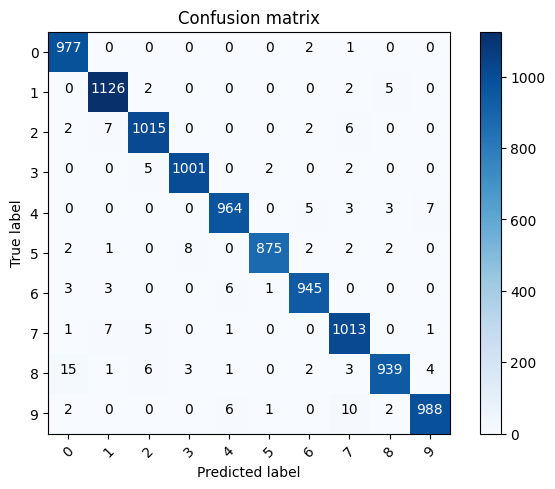

In [12]:
# Plot confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title),
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j]> thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

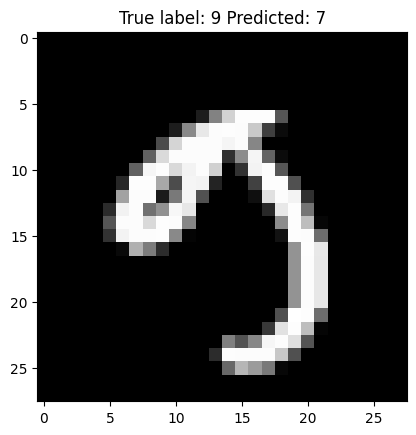

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));